In [24]:
import numpy as np
import matplotlib.pyplot as plt
import openfermion as of
import stim
from src.preprocessing.calc_clifford_transforms import clifford_transform_multiple_groups_to_zs
from src.preprocessing.commuting_groups import commuting_groups
from src.utils import qubitop_to_stim_pauli_strings

%load_ext scalene

LOADING
Scalene extension successfully loaded. Note: Scalene currently only
supports CPU+GPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.


[[0, 1, 2, 4, 8], [3, 5, 7, 9, 16], [6, 10, 11, 14, 17], [12, 13, 15, 18, 20], [19, 21, 22, 23, 24], [25, 26, 27, 28], [29, 30, 31]]
[[0, 1, 2, 4, 8, 16], [3, 5, 7, 9, 17, 32], [6, 10, 11, 14, 18, 33], [12, 13, 15, 19, 20, 34], [21, 22, 23, 24, 28, 35], [25, 26, 27, 29, 36, 40], [30, 31, 37, 38, 41, 44], [39, 42, 43, 45, 46, 48], [47, 49, 50, 51, 52, 56], [53, 54, 55, 57, 60], [58, 59, 61, 62], [63]]
[[0, 1, 2, 4, 8, 16, 32], [3, 5, 7, 9, 17, 33, 64], [6, 10, 11, 14, 18, 34, 65], [12, 13, 15, 19, 20, 35, 66], [21, 22, 23, 24, 28, 36, 67], [25, 26, 27, 29, 37, 40, 68], [30, 31, 38, 41, 42, 44, 69], [39, 43, 45, 46, 47, 48, 70], [49, 50, 51, 52, 56, 71, 80], [53, 54, 55, 57, 60, 72, 81], [58, 59, 61, 62, 73, 82, 88], [63, 74, 75, 76, 78, 83, 89], [77, 79, 84, 85, 90, 92, 96], [86, 87, 91, 93, 94, 97, 112], [95, 98, 99, 100, 102, 104, 113], [101, 103, 105, 106, 108, 114], [107, 109, 110, 111, 115, 120], [116, 117, 118, 121, 124], [119, 122, 123, 125, 126], [127]]
[[0, 1, 2, 4, 8, 16, 32, 

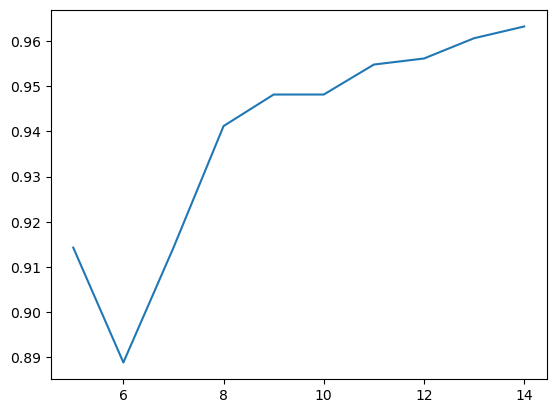

In [26]:
import itertools
def random_pauli_xs(n, num):
    vecs = np.random.choice([0, 1], size=(num, n))
    qops = [of.QubitOperator(' '.join([f'X{i}' for i in range(n) if vec[i]])) for vec in vecs]
    return qops

def all_pauli_xs(n):
    binary_arrays = list(itertools.product([0, 1], repeat=n))
    paulistrings = []
    for j, vec in enumerate(binary_arrays):
        ps = stim.PauliString(n)
        for i in range(n):
            if vec[i]:
                ps[i] = 1
        paulistrings.append(ps)
    return paulistrings

ns = list(range(5,15))
fillings = []
for n in ns:
    group_idxs = [np.arange(2**n)]
    operator_groups = [all_pauli_xs(n)]

    tableaus, pauli_idxs = clifford_transform_multiple_groups_to_zs(operator_groups, group_idxs, n)
    print(pauli_idxs)
    fillings.append(np.mean([len(idx) for idx in pauli_idxs]) / n)

plt.plot(ns, fillings)


Text(0, 0.5, 'filling')

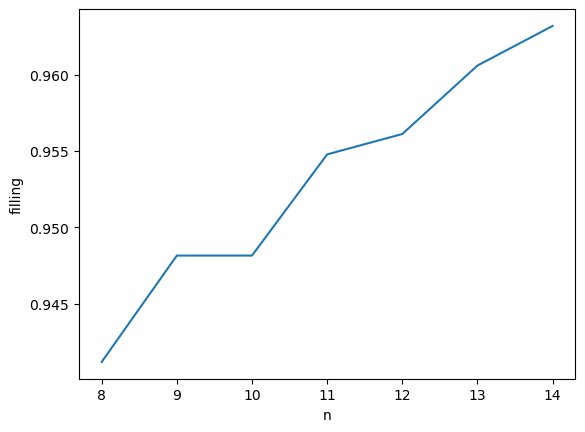

In [28]:
plt.plot(ns[3:], fillings[3:])
plt.xlabel("n")
plt.ylabel("filling")

In [29]:
import pandas as pd

data = {'ns': ns, 'fillings': fillings}
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
